In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
#Adding overweight column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['Overweight'] = (df['BMI'] > 25).astype(int)

In [4]:
#Normalizing the data
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


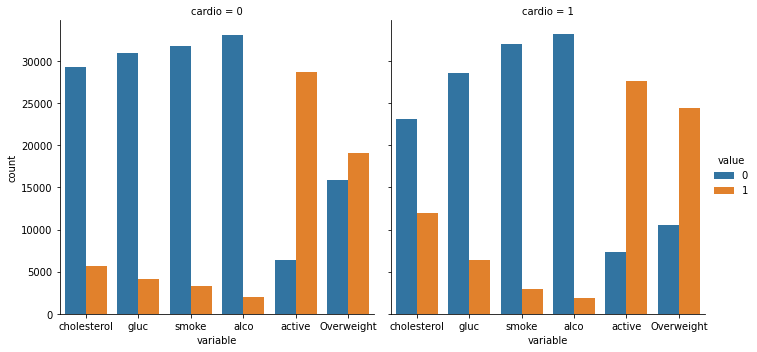

In [6]:
# Convert the data into long format
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'Overweight'])

# Create a catplot
sns.catplot(x='variable', hue='value', col='cardio', data=df_long, kind='count', height=5, aspect=1)

# Show the plot
plt.show()


In [7]:
# Filter out rows where diastolic pressure is higher than systolic
df = df[df['ap_lo'] <= df['ap_hi']]

# Filter out rows where height is less than the 2.5th percentile
df = df[df['height'] >= df['height'].quantile(0.025)]

# Filter out rows where height is more than the 97.5th percentile
df = df[df['height'] <= df['height'].quantile(0.975)]

# Filter out rows where weight is less than the 2.5th percentile
df = df[df['weight'] >= df['weight'].quantile(0.025)]

# Filter out rows where weight is more than the 97.5th percentile
df = df[df['weight'] <= df['weight'].quantile(0.975)]


In [10]:
df.corr()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,0.000050,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.110329,0.089282
sex,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.138660,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.276587,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.858664,0.655764
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.024453,0.016900
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.213072,0.169567
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.164566,0.126770
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.119661,0.086850
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.043446,-0.003981


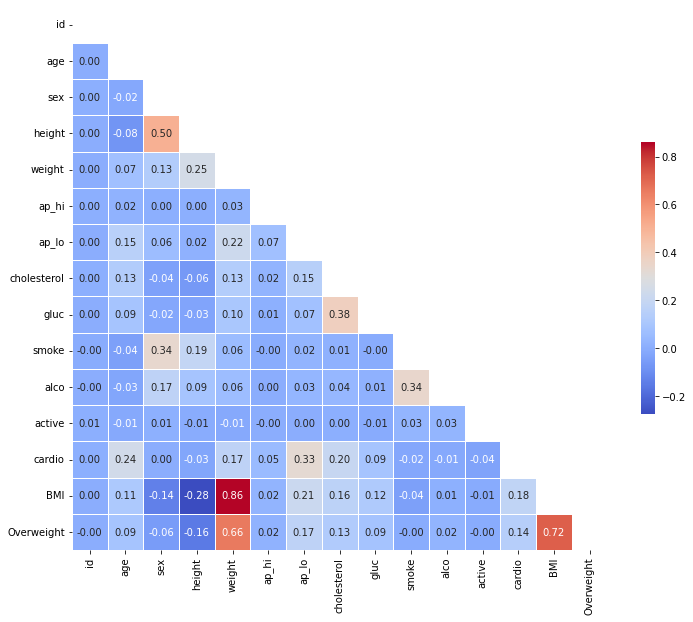

In [14]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.5})

# Show the plot
plt.show()